In [49]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
import statsmodels.api as sm

In [50]:
df = pd.read_csv('electricity_bill_dataset.csv')

In [51]:
df.sample(5)

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,City,Company,MonthlyHours,TariffRate,ElectricityBill
9925,8,21,0,13,1,0,11,Kolkata,Guj Ind Power,449,8.7,3906.3
18369,22,22,0,4,1,0,10,New Delhi,NTPC Pvt. Ltd.,566,8.5,4811.0
26584,21,23,0,11,12,0,11,Dahej,Neueon Towers / Sujana Towers Ltd.,531,7.6,4035.6
181,19,22,0,10,1,0,9,Ratnagiri,NLC India,408,7.4,3019.2
18650,14,22,0,15,1,0,5,Shimla,Ratnagiri Gas and Power Pvt. Ltd. (RGPPL),472,7.7,3634.4


  This dataset contains information about electricity consumption and billing patterns
  of Indian households. It records the number of appliances, their monthly usage hours,
  tariff rates, and other contextual details such as city, electricity provider, and month.
  The goal is to predict the monthly electricity bill based on household appliance usage,
  consumption duration, and tariff rates.

In [52]:
df.shape

(45345, 12)

### data size is :
45345 raw of data in 12 columns

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45345 entries, 0 to 45344
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Fan              45345 non-null  int64  
 1   Refrigerator     45345 non-null  int64  
 2   AirConditioner   45345 non-null  int64  
 3   Television       45345 non-null  int64  
 4   Monitor          45345 non-null  int64  
 5   MotorPump        45345 non-null  int64  
 6   Month            45345 non-null  int64  
 7   City             45345 non-null  object 
 8   Company          45345 non-null  object 
 9   MonthlyHours     45345 non-null  int64  
 10  TariffRate       45345 non-null  float64
 11  ElectricityBill  45345 non-null  float64
dtypes: float64(2), int64(8), object(2)
memory usage: 4.2+ MB


In [54]:
df.describe(include='all')

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,City,Company,MonthlyHours,TariffRate,ElectricityBill
count,45345.000000,45345.000000,45345.000000,45345.000000,45345.000000,45345.0,45345.000000,45345,45345,45345.000000,45345.000000,45345.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,32,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hyderabad,Ringfeder Power Transmission India Pvt. Ltd.,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2914,1486,NaN,NaN,NaN
mean,13.990694,21.705458,1.503959,12.502635,2.865057,0.0,6.488058,NaN,NaN,515.083207,8.369648,4311.771307
std,5.470816,1.672575,1.115482,5.756007,3.894933,0.0,3.443252,NaN,NaN,122.618017,0.576992,1073.886406
min,5.000000,17.000000,0.000000,3.000000,1.000000,0.0,1.000000,NaN,NaN,95.000000,7.400000,807.500000
25%,9.000000,22.000000,1.000000,7.000000,1.000000,0.0,3.000000,NaN,NaN,429.000000,7.900000,3556.800000
50%,14.000000,22.000000,2.000000,13.000000,1.000000,0.0,6.000000,NaN,NaN,515.000000,8.400000,4299.400000
75%,19.000000,23.000000,2.000000,17.000000,1.000000,0.0,9.000000,NaN,NaN,601.000000,8.900000,5038.800000


### Non-Null Counts:

All columns have 45,345 non-null entries, indicating no missing values in the dataset. This is a significant advantage for analysis, as no imputation or data cleaning for missing values is required.


### Data Types:

Numeric Columns (8 int64, 2 float64): Most columns are numeric, suitable for quantitative analysis, such as correlations or regression modeling.
Categorical Columns (2 object): City and Company are categorical variables, which may require encoding (e.g., one-hot encoding) for machine learning tasks.

## Key Analytical Insights

### Data Completeness: 
The dataset is clean with no missing values, simplifying preprocessing for analysis or modeling.

### Feature Relevance:
MotorPump is likely irrelevant, as it is always 0 and provides no variability.
MonthlyHours, TariffRate, and ElectricityBill are critical for predicting electricity costs, as they directly relate to consumption and pricing.
Appliance counts (Fan, Refrigerator, AirConditioner, Television, Monitor) show varying degrees of variability, suggesting they may have different impacts on the electricity bill.

Month may capture seasonal variations in electricity usage (e.g., higher usage in summer due to air conditioners).
City and Company may capture regional or provider-specific effects, but their high cardinality (16 and 32 unique values) may require careful handling in modeling (e.g., grouping or encoding).


### Potential Data Issues:
The high mean for Refrigerator (~21.7) and Television (~12.5) seems unusual for typical households, suggesting the dataset may include commercial or institutional users or possible data entry errors.
The MotorPump column is constant (0), so it can likely be dropped from analysis.


### Distribution Insights:
MonthlyHours and ElectricityBill have high variability, indicating diverse consumption patterns and bill amounts, likely driven by differences in appliance usage and tariff rates.

TariffRate has low variability, suggesting a relatively stable pricing structure across the dataset.
AirConditioner and Monitor show skewed distributions (many households have 1–2 units, but some have significantly more), which could indicate outliers or specific use cases (e.g., offices for monitors).


### Modeling Considerations:
The dataset is well-suited for regression tasks to predict ElectricityBill using features like MonthlyHours, TariffRate, and appliance counts.
Categorical variables (City, Company) may require encoding (e.g., one-hot or target encoding) due to their high cardinality.
The constant MotorPump column can be excluded from models.
The high values for Refrigerator and Television should be investigated for accuracy or context (e.g., are these households or commercial entities?).

<Axes: >

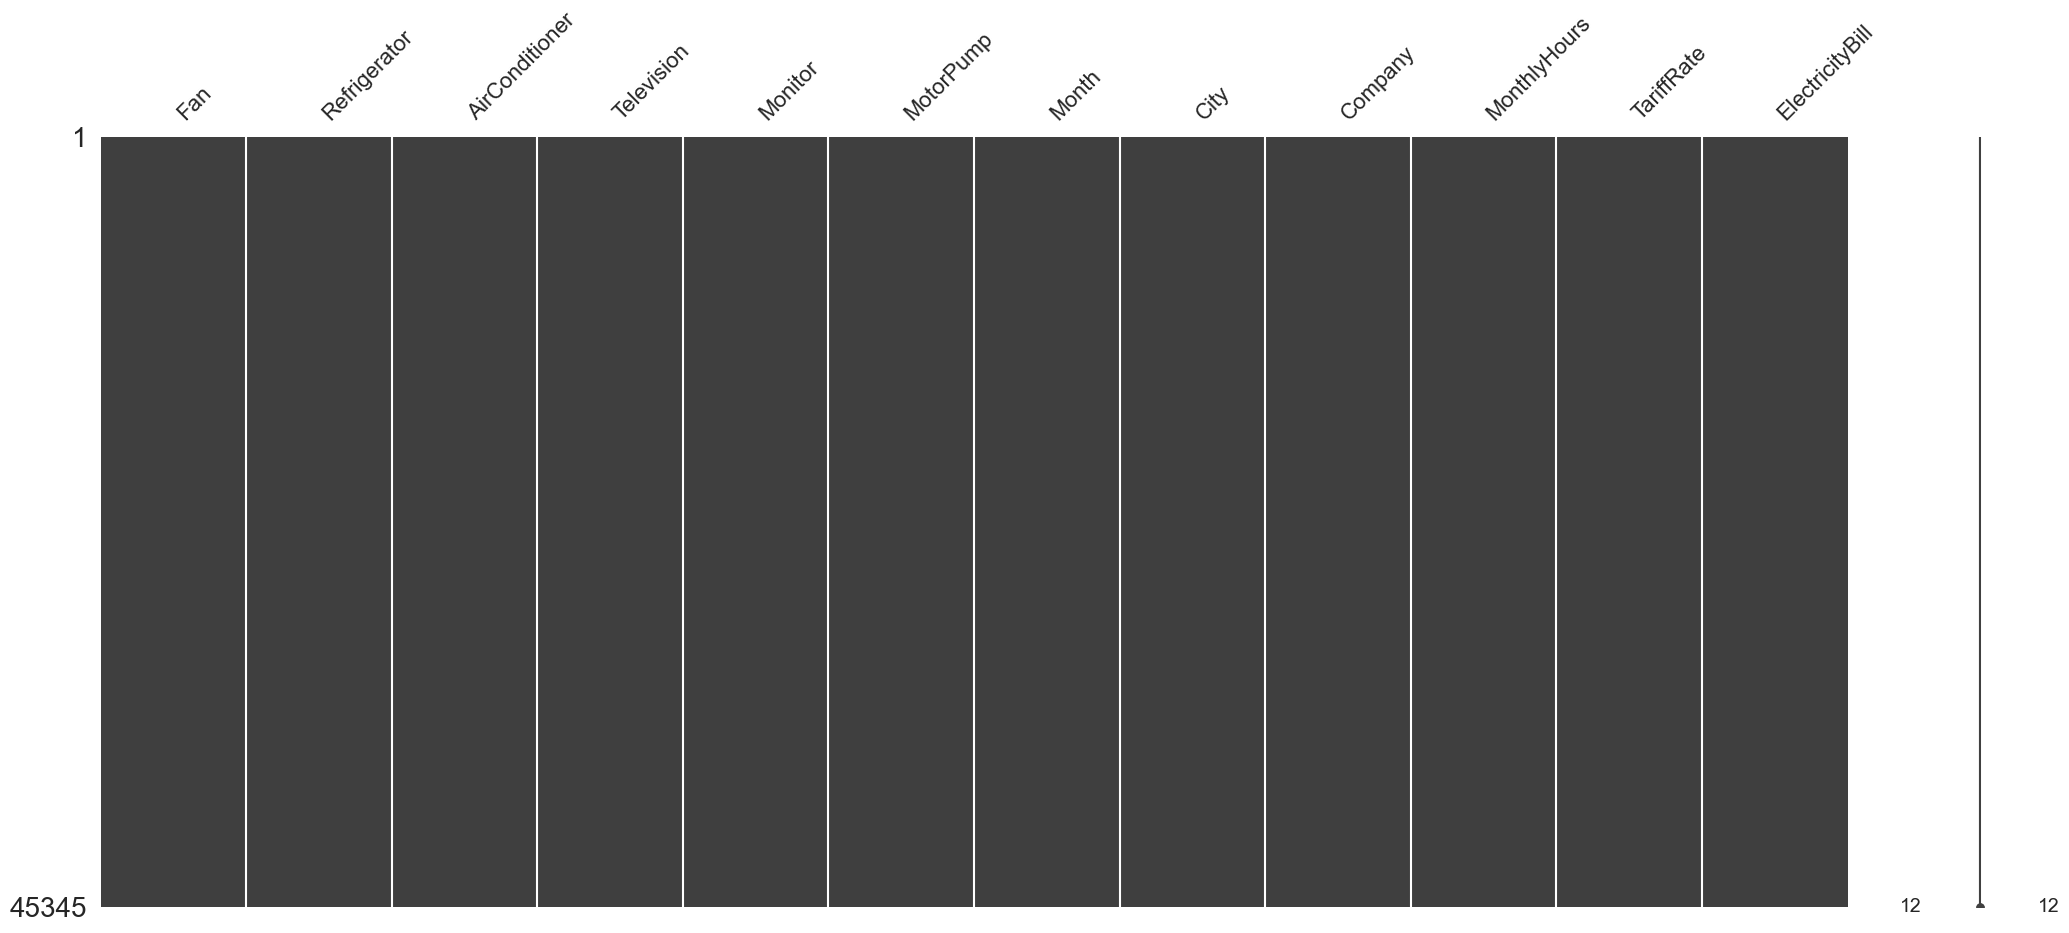

In [55]:
import missingno as mi
mi.matrix(df)

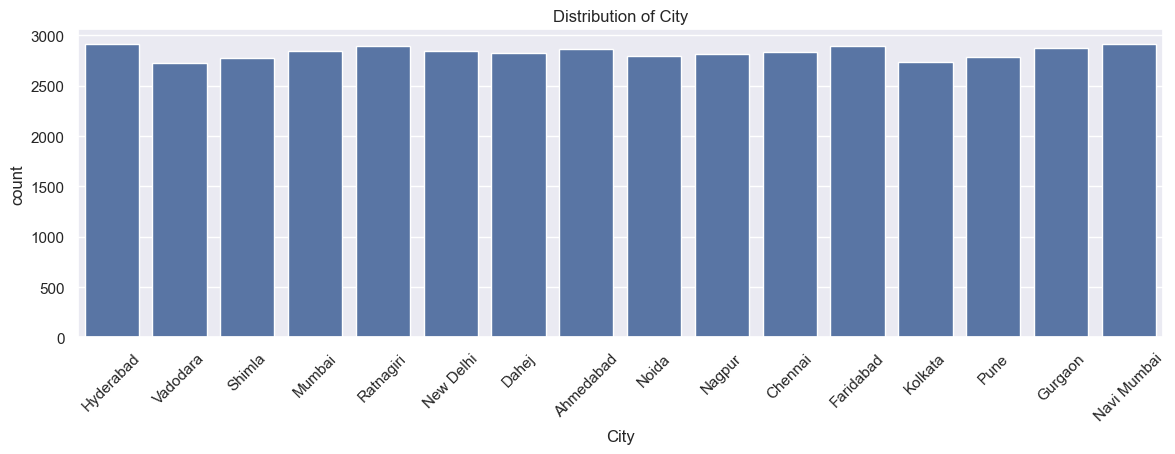

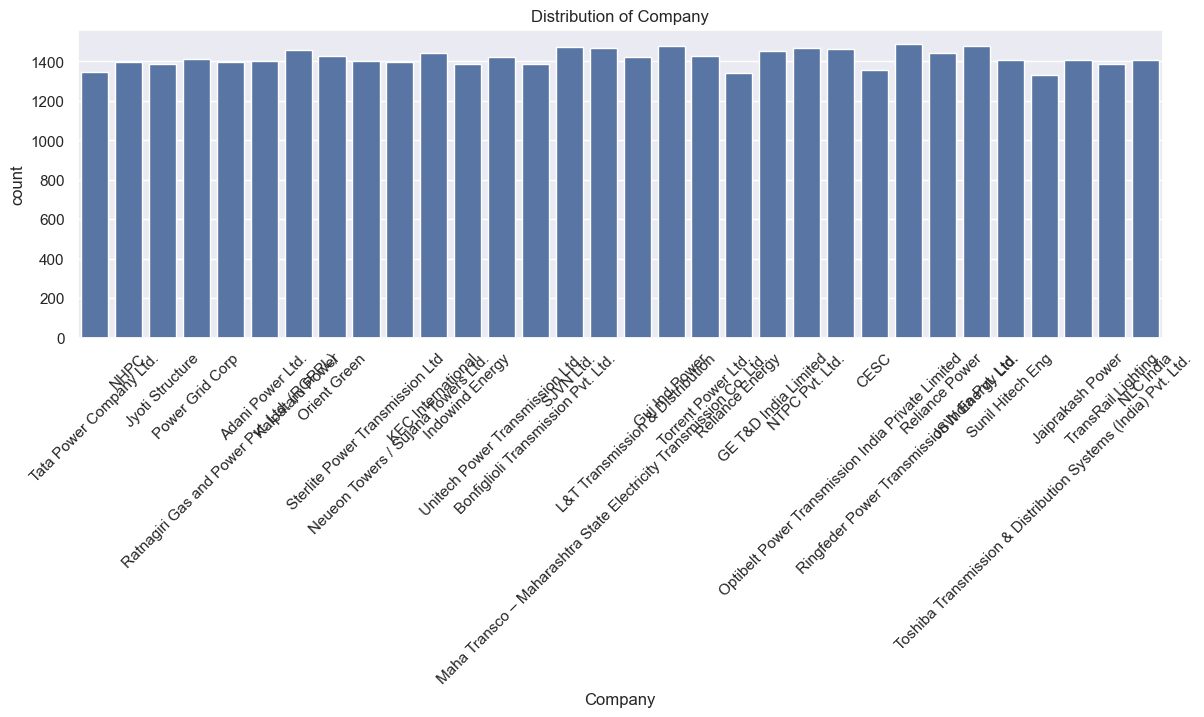

In [56]:
# Visualize data balance for categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    plt.figure(figsize=(14, 4))
    sb.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

In [57]:
df.duplicated().sum()

np.int64(0)

In [58]:
df.drop_duplicates(inplace=True)
df.shape

(45345, 12)

In [59]:
df.nunique()

Fan                  19
Refrigerator          7
AirConditioner        4
Television           20
Monitor               3
MotorPump             1
Month                12
City                 16
Company              32
MonthlyHours        748
TariffRate           16
ElectricityBill    7787
dtype: int64

In [60]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = df.select_dtypes(exclude=['object', 'category']).columns.tolist()

In [61]:
categorical_cols, numerical_cols

(['City', 'Company'],
 ['Fan',
  'Refrigerator',
  'AirConditioner',
  'Television',
  'Monitor',
  'MotorPump',
  'Month',
  'MonthlyHours',
  'TariffRate',
  'ElectricityBill'])

# outlayer detection 

as we want to do analytical outlayer detection we founded that the best wey to do it is using 
### IQR (Interquartile Range) method & Box plot

In [62]:
import math

def plot_boxplots(data, columns):
    n_cols = 3
    n_rows = math.ceil(len(columns) / n_cols)
    plt.figure(figsize=(n_cols * 5, n_rows * 4))
    
    for i, col in enumerate(columns, 1):
        plt.subplot(n_rows, n_cols, i)
        sb.boxplot(y=data[col])
        plt.title(f'Boxplot of {col}')
    
    plt.tight_layout()
    plt.show()


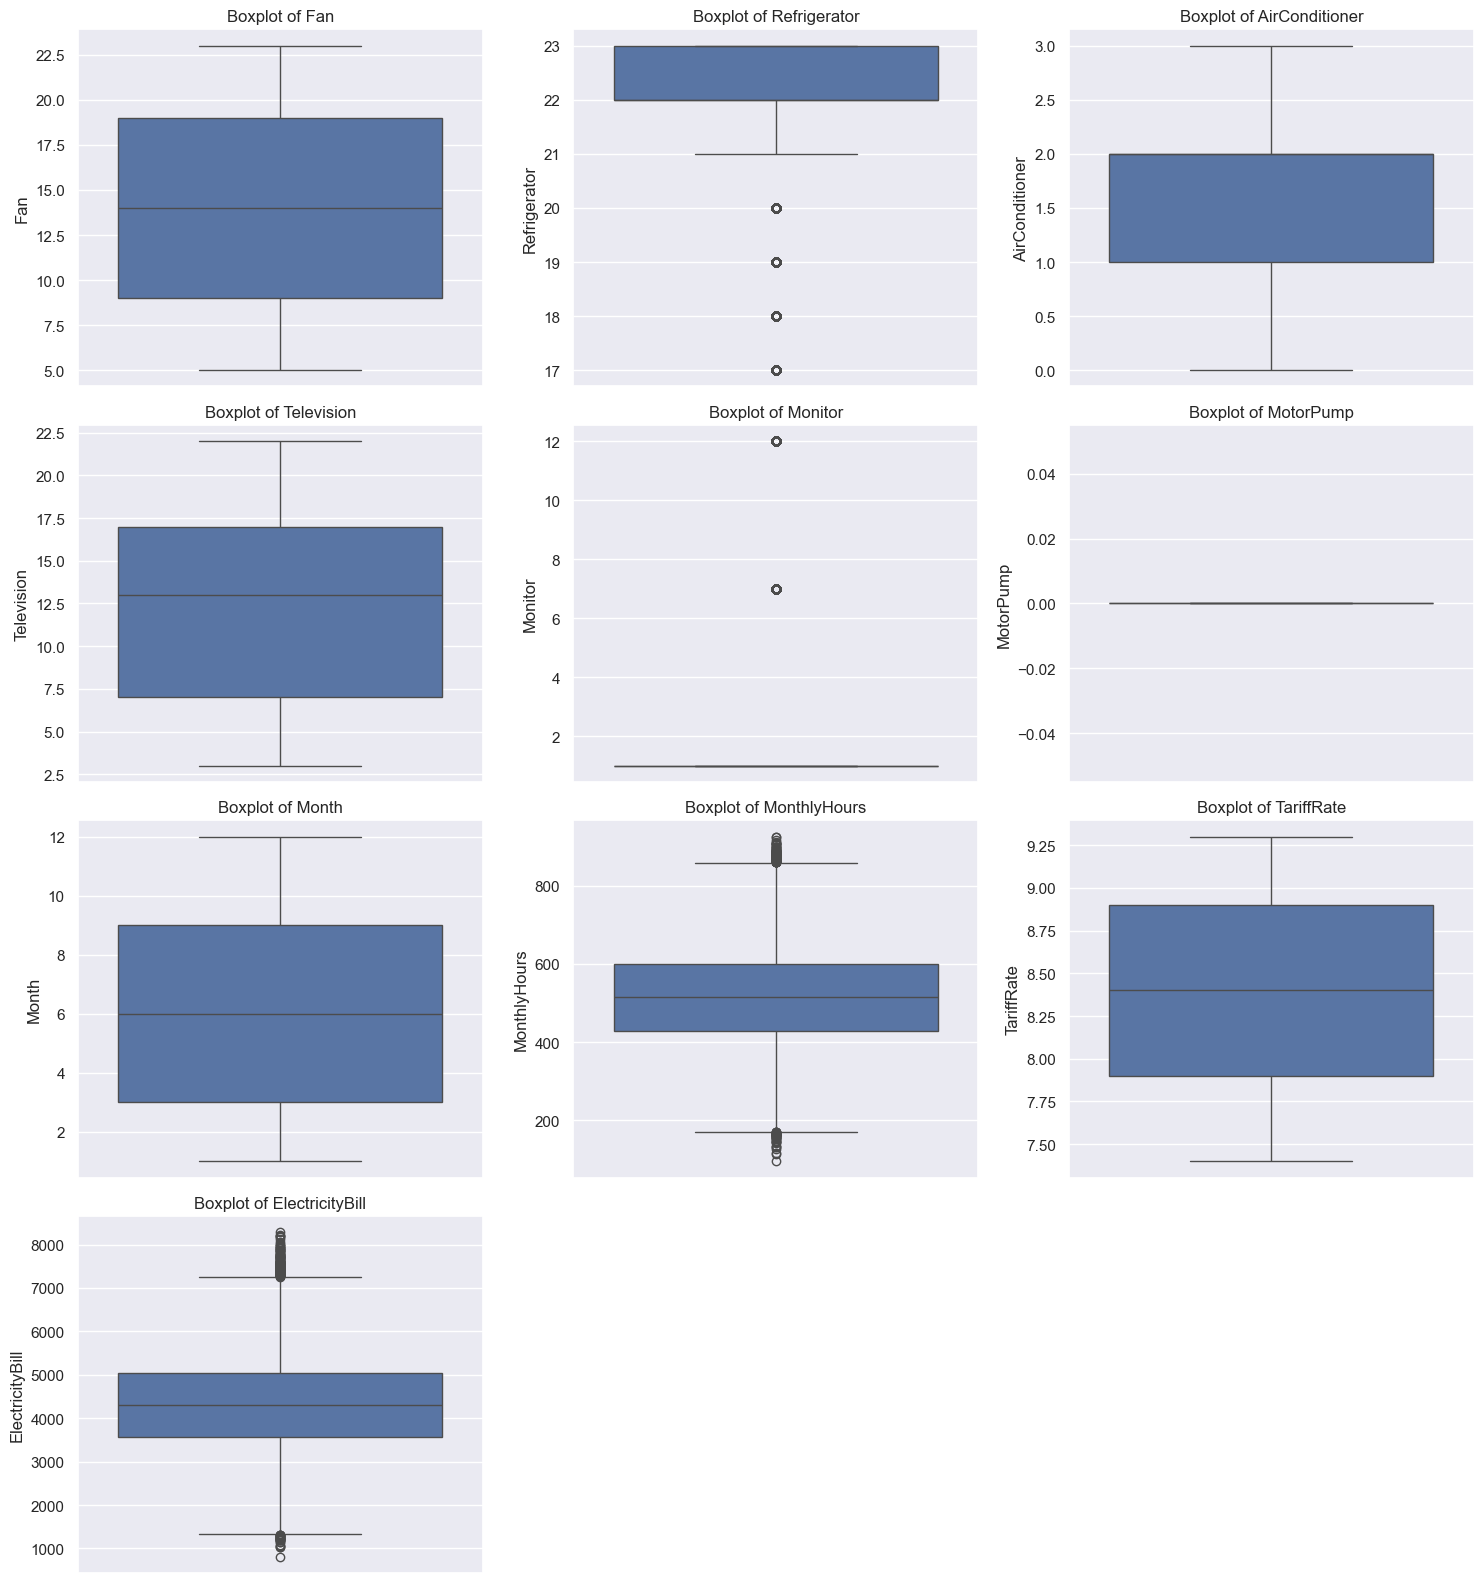

In [63]:
plot_boxplots(df, numerical_cols)

In [64]:
no_outliers_df = df.copy()

for col in numerical_cols:
    Q1 = no_outliers_df[col].quantile(0.25)
    Q3 = no_outliers_df[col].quantile(0.75)

    IQR = Q3 - Q1
    my_min = Q1 - 1.5 * IQR
    my_max = Q3 + 1.5 * IQR

    no_outliers_df = no_outliers_df[(my_min <= no_outliers_df[col]) & (no_outliers_df[col] <= my_max)]

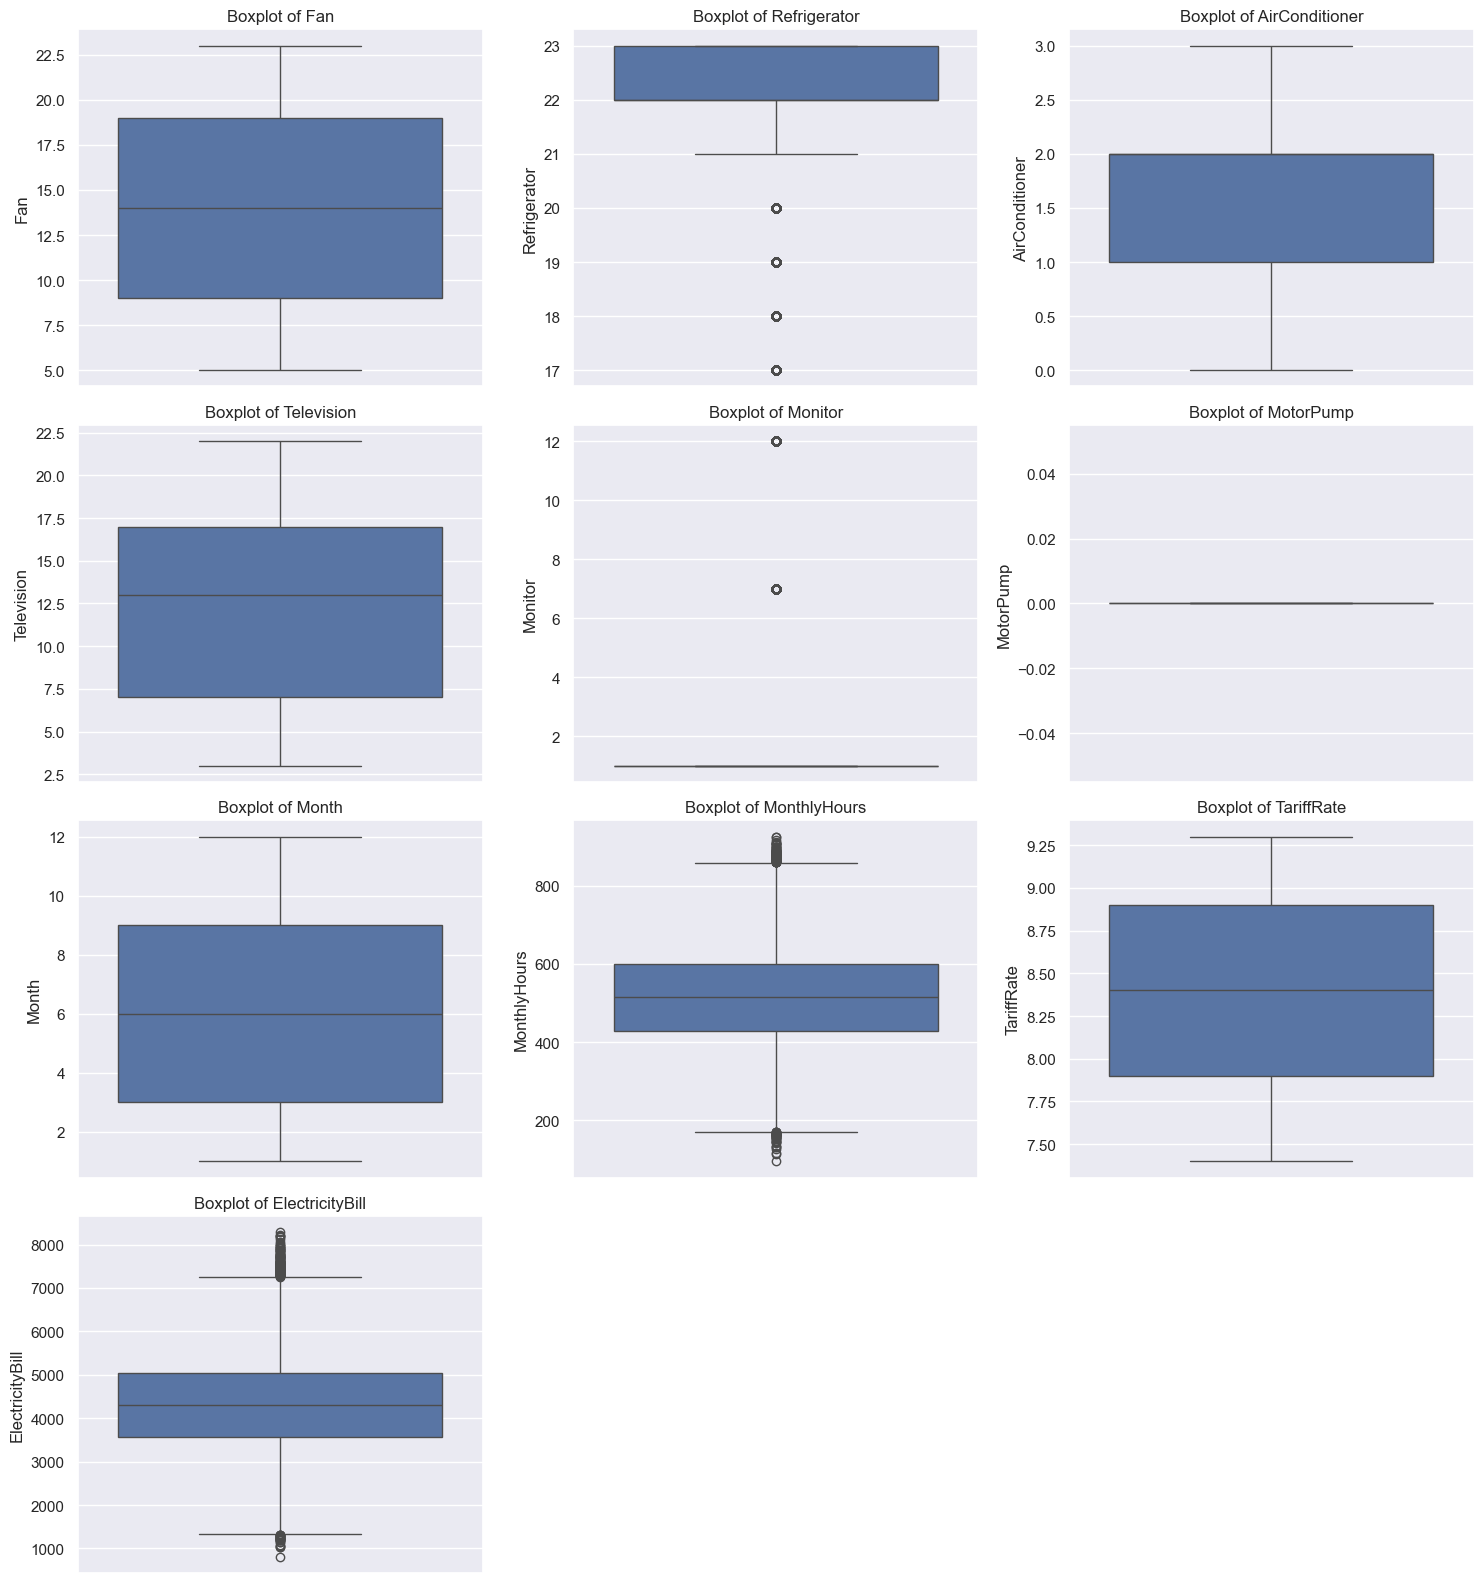

In [65]:
plot_boxplots(df, numerical_cols)

In [66]:
df.shape, no_outliers_df.shape

((45345, 12), (29710, 12))

In [67]:
df = no_outliers_df.copy()